# Recommender Systems Project

In [95]:
from collections import defaultdict
%matplotlib inline
import numpy as np                 # Multi Dimensional Array Handling
import pandas as pd                # Array and Dataframe Handling
import matplotlib.pyplot as plt 

In [96]:
#Reading Dataset
review_data = pd.read_csv("ratings_Electronics (1).csv") 

In [97]:
review_data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [98]:
#Associating Names to the columns of the Dataframe
review_data.columns = ['userID', 'productID', 'Rating', 'TimeStamp']

In [99]:
review_data.head(50)

,userID,productID,Rating,TimeStamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [100]:
#Checking Width and Depth of the Data
print("Number of rows    :", review_data.shape[0])
print("Number of columns :", review_data.shape[1])

Number of rows    : 7824481
Number of columns : 4


In [101]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
userID       object
productID    object
Rating       float64
TimeStamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [102]:
#Changing datatypes of userId and ProductId to catgory as algorithms cannot operate on Object type data
review_data['userID'] = review_data['userID'].astype('category')
review_data['productID'] = review_data['productID'].astype('category')

In [103]:
review_data.describe(include= 'category').transpose()

,count,unique,top,freq
userID,7824481,4201696,A5JLAU2ARJ0BO,520
productID,7824481,476001,B0074BW614,18244


In [104]:
#Dropping timestamp attribute as it will t be required henceforth for analysis and model building
review_data = review_data.drop(['TimeStamp'], axis = 1)

###### Building Popular Recommendation System Model

In [105]:
#Storing copy of original dataframe into new dataframe object
pop_data = review_data.copy()
pop_data.groupby('productID')['Rating'].mean().head()


productID
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
0558835155    3.000000
Name: Rating, dtype: float64

In [106]:
pop_data.groupby('productID')['Rating'].mean().sort_values(ascending= False).head()  

productID
BT008V9J9U    5.0
B0058PRC0S    5.0
B0058ORBFU    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
Name: Rating, dtype: float64

In [107]:
pop_data.groupby('productID')['Rating'].count().sort_values(ascending = False).head()  

productID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [108]:
ratings_mean_count = pd.DataFrame(pop_data.groupby('productID')['Rating'].mean()) 

In [109]:
ratings_mean_count['rating_counts'] = pd.DataFrame(pop_data.groupby('productID')['Rating'].count())

In [110]:
ratings_mean_count.head()  

,Rating,rating_counts
productID,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1


In [111]:
popular_movies = ratings_mean_count.sort_values(['rating_counts', 'Rating'], ascending = [False, False])

In [112]:
popular_movies.head(5)

,Rating,rating_counts
productID,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226


##### Based on High Rating and Rating Count the Popularity Model will list the top Recommended Movies using Popular Recommender System.

In [113]:
new_data= review_data.copy()

##### Building User-User Collaborative Filtering Recommender Model:

In [114]:
new_data['Rating_Count'] = new_data.groupby(['userID'])['Rating'].transform('count')
new_data.drop_duplicates()

,userID,productID,Rating,Rating_Count
0,A2CX7LUOHB2NDG,0321732944,5.0,4
1,A2NWSAGRHCP8N5,0439886341,1.0,1
2,A2WNBOD3WNDNKT,0439886341,3.0,1
3,A1GI0U4ZRJA8WN,0439886341,1.0,1
4,A1QGNMC6O1VW39,0511189877,5.0,2
5,A3J3BRHTDRFJ2G,0511189877,2.0,19
6,A2TY0BTJOTENPG,0511189877,5.0,4
7,A34ATBPOK6HCHY,0511189877,5.0,3
8,A89DO69P0XZ27,0511189877,5.0,1
9,AZYNQZ94U6VDB,0511189877,5.0,5


In [115]:
new_data = new_data[new_data['Rating_Count'] > 50]
print(new_data['Rating_Count'].unique())

[110  72 151  58 163  54  69  99  84  53  57 149  92  59 520 102  64  66
 114  60  83 266 139 127 144  95  73 162 220  71  51  70 314 501  81  62
 226  90 177  75  74  68 108 131  96  79  61 111 406 112 103 204 116 239
 227  67  87 137 431 167  56 130 189  55  98 308 109 156 192 238 159  88
 252 176 218  52 174 125  63 199  94 105 147  93  91 101 181 200 104 145
 115 213  89  77 498  65 198 292  78 282 153  76  86  80  97  82 100 202
 126 196 129 193 279 216 123 132 240 107 270 207 118 209 121 157 277 119
 170 380 155 150  85 182 225 136 138 168 128 311 117 143 296 221 106 146
 244 253 120 122 141 124 169 197 160 257 142 236 261 173 180 212 134 247
 208 205 171]


In [116]:
new_data.head(100)

,userID,productID,Rating,Rating_Count
117,AT09WGFUM934H,0594481813,3.0,110
176,A32HSNCNPRUMTR,0970407998,1.0,72
177,A17HMM1M7T9PJ1,0970407998,4.0,151
491,A3CLWR1UUZT6TG,0972683275,5.0,58
630,A3TAS1AG6FMBQW,0972683275,5.0,163
1137,A25RTRAPQAJBDJ,0972683275,5.0,54
1309,A3LDPF5FMB782Z,1400501466,5.0,69
1321,A1A5KUIIIHFF4U,1400501466,1.0,99
1334,A2XIOXRRYX0KZY,1400501466,3.0,84
1450,AW3LX47IHPFRL,1400501466,5.0,53


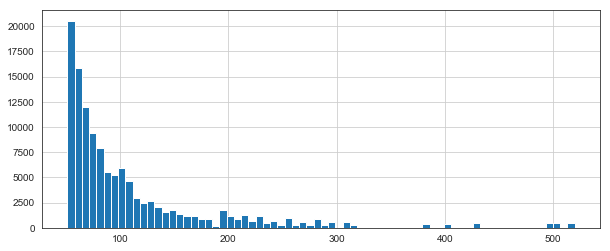

In [117]:
import seaborn as sns 
  
sns.set_style('white') 
 
 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
new_data['Rating_Count'].hist(bins = 70)

In [118]:
#Installing surprise library
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [119]:
from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [120]:
new_data_collab = new_data.drop(['Rating_Count'], axis = 1)

In [121]:
from surprise import Dataset
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(new_data_collab[['userID', 'productID', 'Rating']], reader)

In [122]:
trainset, testset = train_test_split(data, test_size = .30)

In [123]:
algo = KNNWithMeans(k = 1000, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [124]:
# we can now query for specific predicions
uid = str('A25RTRAPQAJBDJ')  # raw user id
iid = str('1400699169')  # raw item id

In [125]:
# getting a prediction for specific user and random item.
pred = algo.predict(uid, iid, verbose = True)

user: A25RTRAPQAJBDJ item: 1400699169 r_ui = None   est = 4.26   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [126]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [127]:
test_pred

[Prediction(uid='A2M14CFAMF8J7I', iid='B007R9M6PO', r_ui=5.0, est=4.651162790697675, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AG8YP2XTC5X1I', iid='B004UM7124', r_ui=3.0, est=4.260409967375671, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1V5TRJXTI6F01', iid='B0017JY5FE', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AYGEKID3G7DPW', iid='B0000AHO9H', r_ui=5.0, est=4.260409967375671, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3CW0ZLUO5X2B1', iid='B009WWKN1S', r_ui=5.0, est=4.260409967375671, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2R6RA8FRBS608', iid='B0041OSAZ8', r_ui=5.0, est=4.47191011235955, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1KY5G5FP31F2F', iid='B000F4C2AM', r_ui=5.0, est=4.508474576271187, details={'actual_k': 0, 'was_impossible': F

In [128]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0521


1.052060446675805

###### Printing Top 5 Recommendations for Popularity Recommendation Systems: 

In [129]:
top_recommendations = 5

In [94]:
popular_movies.head(top_recommendations)    #Predicting top Recommendations from Popular Recommendation Systems

,Rating,rating_counts
productID,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226


##### Printing Top 5 Recommendations for each user based on user - user collaborative technique. 

In [90]:
def get_top_n(test_pred, n = 5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(test_pred, n = 5)

In [91]:
top_n

defaultdict(list,
            {'AEJAGHLC675A7': [('B007SHJIO2', 5),
              ('B0016D1I0G', 5),
              ('B0014SWPO6', 5),
              ('B004CLYEH8', 5),
              ('B001TH7GUU', 5)],
             'A2NOIWPJDD7WIQ': [('B00005LEN4', 4.33296948733834),
              ('B00APLXDQC', 4.265601796092096),
              ('B007ZL0PI4', 4.265601796092096),
              ('B002HWRJY4', 3.652173913043478),
              ('B008F4NL04', 3.652173913043478)],
             'A2NYK9KWFMJV4Y': [('B00JX1ZS5O', 5),
              ('B00ISFNSBW', 5),
              ('B00KGQC4QQ', 5),
              ('B00INTDOT4', 5),
              ('B000VX6XL6', 5)],
             'A1KY5G5FP31F2F': [('B00834SJSK', 5),
              ('B006JO1XQG', 4.616666666666666),
              ('B004Q3RE2O', 4.616666666666666),
              ('B001DXGBII', 4.616666666666666),
              ('B00AOG1Y2S', 4.616666666666666)],
             'AFQBS241UKPAZ': [('B007K3SB6K', 5),
              ('B00FPKDPZC', 4.918498168498169),
     

Summary:
1. Popularity Recommender System and Collaborative Recommender System were built on the amazon electronic items data which        contained user id and ratings for particular items.
   For Popularity Based Recommendation Systems, the top 5 R commendations are calliberated based on rating counts of top          ratings. It overcomes the problem of cold start to some extent.
2. User User Collaborative Filtering Technique is used for listing top 5 Recommendations to a particular user.
   It gives personalised Recommendation and overcomes the drawbacks of Popularity Based Recommender System where there is no      variety. It takes care of User's choice and behavior alongwith product's ratings.
   Pearson Similarity Technique is used over cosine similarity because our data is subjected to user-bias and has different ratings scales of users.
3. Hence, it is wise to use both techniques, Popularity Recommender System for new Users and User-User Collaborative filtering    once user has got aquainted and created some patterns to understand his behavior.
4. Item -Item Collaborative Filtering was also tried but couldnt fit the algorithm due to memory space error because of            limtation of memory space as kNN requires extensive memory.